## ICX Media Data Science Challenge

#### Vishal Hundal

The dataset used for this challenge is the [wiki4HE Data Set](https://archive.ics.uci.edu/ml/datasets/wiki4HE) from the UCI Machine Learning Repository. It is a survey of faculty members from two Spanish universities on teaching uses of Wikipedia.

#### This repository contains:
- `orignalDataset.csv`: Downloaded dataset, that surveys faculty members from two Spanish universities on how they percieve and use Wikipedia in teaching/acadameia.


- `cleanDataset.csv`: Cleaned and munged version of the original dataset.


- `ICX Media Data Science Challenge.ipynb`: The completed challenge that does exploratory data analysis, clustering and classification on the dataset.


- `diagram.jpg`: A diagram of the pipeline so the below processes can be rebuilt.

#### Dataset Description:
This dataset contains 53 attributes and 913 datapoints. The attributes are:
1. **Age**: Integer


2. **Gender**: Male=0; Female=1


3. **Domain**: Arts & Humanities=1; Sciences=2; Health Sciences=3; Engineering & Architecture=4; Law & Politics=5; Other=6


4. **PhD**: No=0; Yes=1


5. **Experience Years (YEARSEXP)**: Integer


6. **University**: Open University of Catalonia (UOC)=0; Pompeu Fabra University (UPF)=1


7. **Position at UOC (UOC_Position)**: Professor=1; Associate=2; Assistant=3; Lecturer=4; Instructor=5; Adjunct=6;


8. **Main job at another university (OTHER_POSITION)**: No=0; Yes=1;


9. **Position at UPF/part-time at another university (OTHER_STATUS)**:  Professor=1; Associate=2; Assistant=3; Lecturer=4; Instructor=5; Adjunct=6; Other=7;


10. **10-53**: These are all survey items that rank from strongly disagree/never (1) to strongly agree/always (5). These survey items are ala about Wikipedia, its use and perception in higher education.

##### Note: ? = N/A for all of the attributes above.

---
### Starting off & downloading the dataset
Here I import the all of the necessary libraries and modules required for the entire challenge, and also download and save the dataset as a CSV file.

In [71]:
import module
import requests
import csv
import pandas as pd
from os import remove
from os import path
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, SpectralClustering, Birch
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_samples, silhouette_score, classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression, LinearRegression, Perceptron
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold, cross_val_score
from sklearn.svm import SVC

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00334/wiki4HE.csv"
r = requests.get(url, allow_redirects = True)
open("originalDataset.csv", "wb").write(r.content)

99358

---
## Cleaning the data:

As you can see below, the data in the file from the UCI repository is messy and hard to read. In particular, the formatting is not consistent with csv format, and as such will be hard to use without cleaning. In this section, I put all of the data into CSV format, replace question marks in the dataset with `numpy.nan`, and convert all data to its proper type.

In [3]:
pd.read_csv("originalDataset.csv")

,AGE;GENDER;DOMAIN;PhD;YEARSEXP;UNIVERSITY;UOC_POSITION;OTHER_POSITION;OTHERSTATUS;USERWIKI;PU1;PU2;PU3;PEU1;PEU2;PEU3;ENJ1;ENJ2;Qu1;Qu2;Qu3;Qu4;Qu5;Vis1;Vis2;Vis3;Im1;Im2;Im3;SA1;SA2;SA3;Use1;Use2;Use3;Use4;Use5;Pf1;Pf2;Pf3;JR1;JR2;BI1;BI2;Inc1;Inc2;Inc3;Inc4;Exp1;Exp2;Exp3;Exp4;Exp5
0,40;0;2;1;14;1;2;?;?;0;4;4;3;5;5;3;4;4;3;3;2;2;...
1,42;0;5;1;18;1;2;?;?;0;2;3;3;4;4;3;3;4;4;4;3;3;...
2,37;0;4;1;13;1;3;?;?;0;2;2;2;4;4;3;3;3;2;2;2;5;...
3,40;0;4;0;13;1;3;?;?;0;3;3;4;3;3;3;4;3;3;4;3;3;...
4,51;0;6;0;8;1;3;?;?;1;4;3;5;5;4;3;4;4;4;5;4;3;4...
...,...
908,43;0;5;1;21;2;?;?;2;0;3;3;3;5;5;2;4;5;3;3;4;5;...
909,53;0;6;0;25;2;?;?;6;0;3;3;4;5;4;3;4;4;4;4;4;3;...
910,39;0;5;1;9;2;?;?;4;0;3;3;3;5;4;3;3;4;3;3;2;5;2...
911,40;0;3;1;10;2;?;?;2;0;3;3;5;5;4;2;4;4;4;4;3;2;...


In [4]:
if path.exists("cleanDataset.csv"):
    remove("cleanDataset.csv")

with open('originalDataset.csv', newline = '') as ogDataset:
    reader = csv.reader(ogDataset)
    first_iteration = True
    with open('cleanDataset.csv', 'w') as dataset:
        for row in reader:
            line = row[0].split(";")
            filewriter = csv.writer(dataset, delimiter=',')
            filewriter.writerow(line)


In [5]:
df = pd.read_csv("cleanDataset.csv")
df.head()

,AGE,GENDER,DOMAIN,PhD,YEARSEXP,UNIVERSITY,UOC_POSITION,OTHER_POSITION,OTHERSTATUS,USERWIKI,...,BI2,Inc1,Inc2,Inc3,Inc4,Exp1,Exp2,Exp3,Exp4,Exp5
0,40,0,2,1,14,1,2,?,?,0,...,3,5,5,5,5,4,4,4,1,2
1,42,0,5,1,18,1,2,?,?,0,...,2,4,4,3,4,2,2,4,2,4
2,37,0,4,1,13,1,3,?,?,0,...,1,5,3,5,5,2,2,2,1,3
3,40,0,4,0,13,1,3,?,?,0,...,3,3,4,4,3,4,4,3,3,4
4,51,0,6,0,8,1,3,?,?,1,...,5,5,5,4,4,5,5,5,4,4


In [6]:
df["AGE"] = pd.to_numeric(df["AGE"])
df["GENDER"] = pd.Categorical(df['GENDER'])
df["DOMAIN"] = pd.to_numeric(pd.Categorical(df["DOMAIN"], categories=["1","2","3","4","5","6"]))
df["PhD"] = pd.to_numeric(df["PhD"]).astype(int)
df["YEARSEXP"] = df["YEARSEXP"].apply(pd.to_numeric, errors='coerce')
df["UNIVERSITY"] = pd.to_numeric(df["UNIVERSITY"]).astype(int)
df["UOC_POSITION"] = pd.to_numeric(pd.Categorical(df["UOC_POSITION"], categories=["1","2","3","4","5","6"]))
df["OTHER_POSITION"] = df["OTHER_POSITION"].apply(pd.to_numeric, errors='coerce')
df["OTHERSTATUS"] = df["OTHERSTATUS"].apply(pd.to_numeric, errors='coerce')
df["USERWIKI"] = df["USERWIKI"].apply(pd.to_numeric, errors='coerce')


counter = 0
for col in df.columns:
    counter += 1
    if counter > 10:
        df[col] = pd.to_numeric(pd.Categorical(df[col], categories=["1","2","3","4","5","6"]))
    

In [7]:
df

,AGE,GENDER,DOMAIN,PhD,YEARSEXP,UNIVERSITY,UOC_POSITION,OTHER_POSITION,OTHERSTATUS,USERWIKI,...,BI2,Inc1,Inc2,Inc3,Inc4,Exp1,Exp2,Exp3,Exp4,Exp5
0,40,0,2.0,1,14.0,1,2.0,NaN,NaN,0.0,...,3.0,5.0,5.0,5.0,5.0,4.0,4.0,4.0,1.0,2.0
1,42,0,5.0,1,18.0,1,2.0,NaN,NaN,0.0,...,2.0,4.0,4.0,3.0,4.0,2.0,2.0,4.0,2.0,4.0
2,37,0,4.0,1,13.0,1,3.0,NaN,NaN,0.0,...,1.0,5.0,3.0,5.0,5.0,2.0,2.0,2.0,1.0,3.0
3,40,0,4.0,0,13.0,1,3.0,NaN,NaN,0.0,...,3.0,3.0,4.0,4.0,3.0,4.0,4.0,3.0,3.0,4.0
4,51,0,6.0,0,8.0,1,3.0,NaN,NaN,1.0,...,5.0,5.0,5.0,4.0,4.0,5.0,5.0,5.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,43,0,5.0,1,21.0,2,NaN,NaN,2.0,0.0,...,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN
909,53,0,6.0,0,25.0,2,NaN,NaN,6.0,0.0,...,4.0,4.0,3.0,3.0,4.0,4.0,4.0,4.0,1.0,1.0
910,39,0,5.0,1,9.0,2,NaN,NaN,4.0,0.0,...,2.0,5.0,4.0,3.0,NaN,5.0,5.0,5.0,4.0,1.0
911,40,0,3.0,1,10.0,2,NaN,NaN,2.0,0.0,...,5.0,1.0,5.0,2.0,2.0,4.0,4.0,2.0,1.0,1.0


---
### Imputation on the dataset

Now that the data is cleaned and formatted, lots of enteries in the data have NaNs. I will imputate these values, so I can cluster and complete exploratory data analysis. Below I use k-Nearest Neighbors imputation, given that this will fill in the NaNs with values from examples of faculty with similar backgrounds and survey responses. Given the relatively small size of the dataset, I eyetested to see how disparate and similar the dataset is. Given this eyetest I set the hyperparamater k equal to 4. This will make the values that I imputated more resistent to outliers in neighbors, compared to the a k value of 1.

In [8]:
imputer = KNNImputer(n_neighbors=4, weights='uniform')
imputed_dataset = imputer.fit_transform(df)
column_names = list(df.columns.values)
imputed_dataset = pd.DataFrame(data=imputed_dataset, index=None, columns=column_names)
print(imputed_dataset.shape)

(913, 53)


In [9]:
'''with pd.option_context("display.max_rows", None, "display.max_columns", None):
    print(imputed_dataset)
'''

'with pd.option_context("display.max_rows", None, "display.max_columns", None):\n    print(imputed_dataset)\n'

Here I create a seperate dataframe for the dataset where each column in normalized:

In [10]:
x = imputed_dataset.values
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(data=x_scaled, index=None, columns=column_names)
df

,AGE,GENDER,DOMAIN,PhD,YEARSEXP,UNIVERSITY,UOC_POSITION,OTHER_POSITION,OTHERSTATUS,USERWIKI,...,BI2,Inc1,Inc2,Inc3,Inc4,Exp1,Exp2,Exp3,Exp4,Exp5
0,0.369565,0.0,0.2,1.0,0.325581,0.0,0.20,0.25,0.166667,0.0,...,0.50,1.00,1.00,1.00,1.0000,0.75,0.750,0.750,0.0000,0.25
1,0.413043,0.0,0.8,1.0,0.418605,0.0,0.20,0.00,0.166667,0.0,...,0.25,0.75,0.75,0.50,0.7500,0.25,0.250,0.750,0.2500,0.75
2,0.304348,0.0,0.6,1.0,0.302326,0.0,0.40,0.00,0.500000,0.0,...,0.00,1.00,0.50,1.00,1.0000,0.25,0.250,0.250,0.0000,0.50
3,0.369565,0.0,0.6,0.0,0.302326,0.0,0.40,0.75,0.541667,0.0,...,0.50,0.50,0.75,0.75,0.5000,0.75,0.750,0.500,0.5000,0.75
4,0.608696,0.0,1.0,0.0,0.186047,0.0,0.40,0.75,0.958333,1.0,...,1.00,1.00,1.00,0.75,0.7500,1.00,1.000,1.000,0.7500,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,0.434783,0.0,0.8,1.0,0.488372,1.0,0.90,0.25,0.166667,0.0,...,0.25,0.25,0.25,0.25,0.2500,0.25,0.375,0.375,0.0625,0.25
909,0.652174,0.0,1.0,0.0,0.581395,1.0,0.65,0.00,0.833333,0.0,...,0.75,0.75,0.50,0.50,0.7500,0.75,0.750,0.750,0.0000,0.00
910,0.347826,0.0,0.8,1.0,0.209302,1.0,0.85,1.00,0.500000,0.0,...,0.25,1.00,0.75,0.50,0.6875,1.00,1.000,1.000,0.7500,0.00
911,0.369565,0.0,0.4,1.0,0.232558,1.0,1.00,1.00,0.166667,0.0,...,1.00,0.00,1.00,0.25,0.2500,0.75,0.750,0.250,0.0000,0.00


---
## Data Clustering

In this part of the notebook, I compare some simple clustering algorithms and their corresponding silhouette scores, given differing numbers of clusters. I also compare the results between the dataset before and after it has been normalized.

### Clustering and Results on Non-Normalized Data

In [11]:
labels = AffinityPropagation().fit_predict(imputed_dataset)
score = silhouette_score(imputed_dataset, labels)
print("The Affinity silhouette score is: " + str(score))

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(imputed_dataset)
    score = silhouette_score(imputed_dataset, labels)
    print("The kmeans silhouette score for " + str(k) + " clusters is: " + str(score))
    
    ag_ward = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels = ag_ward.fit_predict(imputed_dataset)
    score = silhouette_score(imputed_dataset, labels)
    print("The Agglomerative WARD silhouette score for " + str(k) + " clusters is: " + str(score))
    
    
    bir = Birch(n_clusters=k)
    labels = bir.fit_predict(imputed_dataset)
    score = silhouette_score(imputed_dataset, labels)
    print("The Birch silhouette score for " + str(k) + " clusters is: " + str(score))

    
    spectral = SpectralClustering(n_clusters=k)
    labels = spectral.fit_predict(imputed_dataset)
    score = silhouette_score(imputed_dataset, labels)
    print("The Spectral silhouette score for " + str(k) + " clusters is: " + str(score))
    
    print()

The Affinity silhouette score is: 0.05535374254522736
The kmeans silhouette score for 2 clusters is: 0.2832760044347204
The Agglomerative WARD silhouette score for 2 clusters is: 0.2631745686102316
The Birch silhouette score for 2 clusters is: 0.2631745686102316
The Spectral silhouette score for 2 clusters is: 0.5482673387036692

The kmeans silhouette score for 3 clusters is: 0.20183383933951388
The Agglomerative WARD silhouette score for 3 clusters is: 0.16863105440395404
The Birch silhouette score for 3 clusters is: 0.16863105440395404
The Spectral silhouette score for 3 clusters is: 0.2605985339056617

The kmeans silhouette score for 4 clusters is: 0.21979664773262278
The Agglomerative WARD silhouette score for 4 clusters is: 0.14297940912714216
The Birch silhouette score for 4 clusters is: 0.14297940912714216
The Spectral silhouette score for 4 clusters is: 0.26055607364446554

The kmeans silhouette score for 5 clusters is: 0.15970027221351932
The Agglomerative WARD silhouette scor

At first glance, based on the silhouette scores, Spectral clustering with `k=2` gives us highly effective results. So I will explore and plot the corresponding 2D and 3D graphs below.

#### Spectral Clustering

Below is the 2D visualization of the points and which clusters they belong to (PCA was used to reduce the dimension to 2):

<function matplotlib.pyplot.show(*args, **kw)>

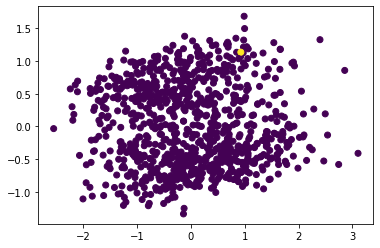

In [12]:
spectral = SpectralClustering(n_clusters=2)
labels = spectral.fit_predict(imputed_dataset)
pca2D = PCA(2)
plot_columns = pca2D.fit_transform(df)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=labels)
plt.show

In [13]:
cluster_one = 0
cluster_two = 0
for label in labels:
    if label == 0:
        cluster_one += 1
    else:
        cluster_two += 1
print(cluster_one)
print(cluster_two)

912
1


With the non-normalized dataset, Spectral clustering with `k=2` is very ineffective. While the silhouette score is very high, upon exploratory analysis you see that one cluster contains 912 elements, while the other contains only 1. Given Spectral clusterings failures here, I will now explore K Means more in depth, as it also has the second highest silouette score.

#### K Means Clustering

Below is the 2D visualization of the points and which clusters they belong to (PCA was used to reduce the dimension to 2):

<function matplotlib.pyplot.show(*args, **kw)>

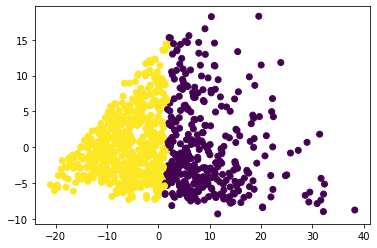

In [14]:
kmeans = KMeans(n_clusters=2)
labels = kmeans.fit_predict(imputed_dataset)
pca2D = PCA(2)
plot_columns = pca2D.fit_transform(imputed_dataset)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=labels)
plt.show

Below is the 3D visualization of the points and which clusters they belong to (PCA was used to reduce the dimension to 3):

/usr/local/lib/python3.7/site-packages/matplotlib/collections.py:886: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<function matplotlib.pyplot.show(*args, **kw)>

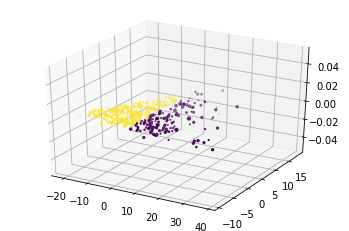

In [15]:
pca3D = PCA(3)
plot_columns = pca3D.fit_transform(imputed_dataset)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.scatter(plot_columns[:,0], plot_columns[:,1], plot_columns[:,2], c=labels)
plt.show

### Clustering and Results on Normalized Data

In [16]:
labels = AffinityPropagation().fit_predict(df)
score = silhouette_score(df, labels)
print("The Affinity silhouette score is: " + str(score))

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(df)
    score = silhouette_score(df, labels)
    print("The kmeans silhouette score for " + str(k) + " clusters is: " + str(score))
    
    ag_ward = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels = ag_ward.fit_predict(df)
    score = silhouette_score(df, labels)
    print("The Agglomerative WARD silhouette score for " + str(k) + " clusters is: " + str(score))
    
    
    bir = Birch(n_clusters=k)
    labels = bir.fit_predict(df)
    score = silhouette_score(df, labels)
    print("The Birch silhouette score for " + str(k) + " clusters is: " + str(score))

    
    spectral = SpectralClustering(n_clusters=k)
    labels = spectral.fit_predict(df)
    score = silhouette_score(df, labels)
    print("The Spectral silhouette score for " + str(k) + " clusters is: " + str(score))
    
    print()

The Affinity silhouette score is: 0.03412087248884132
The kmeans silhouette score for 2 clusters is: 0.1270527431810739
The Agglomerative WARD silhouette score for 2 clusters is: 0.09988626213319633
The Birch silhouette score for 2 clusters is: 0.10537336858196061
The Spectral silhouette score for 2 clusters is: 0.11265456094779072

The kmeans silhouette score for 3 clusters is: 0.09346124638258917
The Agglomerative WARD silhouette score for 3 clusters is: 0.06665148977992312
The Birch silhouette score for 3 clusters is: 0.06582393664597296
The Spectral silhouette score for 3 clusters is: 0.09138163673922121

The kmeans silhouette score for 4 clusters is: 0.08086985902177472
The Agglomerative WARD silhouette score for 4 clusters is: 0.06663919609617056
The Birch silhouette score for 4 clusters is: 0.06191054512657385
The Spectral silhouette score for 4 clusters is: 0.07392505991926926

The kmeans silhouette score for 5 clusters is: 0.0643999689068441
The Agglomerative WARD silhouette s

Given that two clusters seems to work best, based on silhouette value, when the dataset is normalized. I will plot and compare the clusters for Spectral and kmeans clustering, given that they have the two highest silhouette values.

#### Spectral Clustering

Below is the 2D visualization of the points and which clusters they belong to (PCA was used to reduce the dimension to 2):

<function matplotlib.pyplot.show(*args, **kw)>

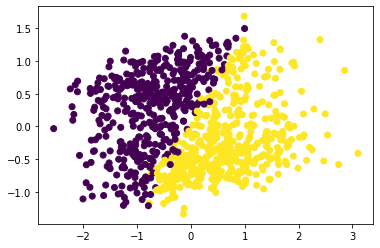

In [17]:
spectral = SpectralClustering(n_clusters=2)
labels = spectral.fit_predict(df)
pca2D = PCA(2)
plot_columns = pca2D.fit_transform(df)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=labels)
plt.show

Below is the 3D visualization of the points and which clusters they belong to (PCA was used to reduce the dimension to 3): 

/usr/local/lib/python3.7/site-packages/matplotlib/collections.py:886: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<function matplotlib.pyplot.show(*args, **kw)>

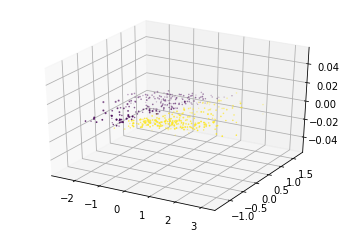

In [18]:
pca3D = PCA(3)
plot_columns = pca3D.fit_transform(df)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.scatter(plot_columns[:,0], plot_columns[:,1], plot_columns[:,2], c=labels)
plt.show

#### KMeans Clustering

Below is the 2D visualization of the points and which clusters they belong to:

kmeans = KMeans(n_clusters=2)
labels = kmeans.fit_predict(df)
pca2D = PCA(2)
plot_columns = pca2D.fit_transform(df)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=labels)
plt.show

/usr/local/lib/python3.7/site-packages/matplotlib/collections.py:886: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<function matplotlib.pyplot.show(*args, **kw)>

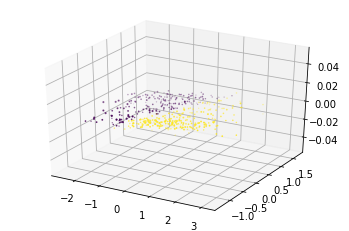

In [19]:
pca3D = PCA(3)
plot_columns = pca3D.fit_transform(df)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.scatter(plot_columns[:,0], plot_columns[:,1], plot_columns[:,2], c=labels)
plt.show

---
### Results and Analysis

Given the high silhouette score for both iterations of kmeans, using the normalized and non-normalized data, I will proceed with using kmeans. K means is also fairly simple, so it will be easy to interpret for the purposes of this notebook. From here on however, I will use the normalized dataset, given that some of the attributes, like age and years of experience have much larger variation than others.

In [20]:
kmeans = KMeans(n_clusters=2)
labels = kmeans.fit_predict(df)

Here we can see the average survey score for each example, and the corresponding label. Based on initial analysis, we can see that that items that are labeled zero, AKA in cluster zero, have higher average survey scores. As such we see that the average survery score for examples labeled one tend to be lower.

In [21]:
columns = df.columns
cols_to_average = []
counter = 0
for column in columns:
    if counter > 9:
        cols_to_average.append(column)
    counter += 1

label_counter = 0
zero_mean = 0
one_mean = 0
zero_counter = 0
one_counter = 0

for index, row in df.iterrows():
    mean = 0
    for col in cols_to_average:
        mean += row[col]
    mean = mean/len(cols_to_average)
    if labels[label_counter] == 0:
        zero_mean += mean
        zero_counter += 1
    else:
        one_mean += mean
        one_counter += 1
    print("The average of all of the survey cores for this example is: " + str(mean) + ", and the label is: " + str(labels[label_counter]))
    label_counter += 1

The average of all of the survey cores for this example is: 0.5232558139534884, and the label is: 1
The average of all of the survey cores for this example is: 0.42441860465116277, and the label is: 1
The average of all of the survey cores for this example is: 0.4127906976744186, and the label is: 1
The average of all of the survey cores for this example is: 0.6104651162790697, and the label is: 0
The average of all of the survey cores for this example is: 0.7965116279069767, and the label is: 0
The average of all of the survey cores for this example is: 0.5813953488372093, and the label is: 0
The average of all of the survey cores for this example is: 0.7311046511627907, and the label is: 0
The average of all of the survey cores for this example is: 0.6337209302325582, and the label is: 0
The average of all of the survey cores for this example is: 0.6453488372093024, and the label is: 0
The average of all of the survey cores for this example is: 0.6991279069767442, and the label is: 0

The average of all of the survey cores for this example is: 0.4127906976744186, and the label is: 1
The average of all of the survey cores for this example is: 0.6337209302325582, and the label is: 0
The average of all of the survey cores for this example is: 0.6293604651162791, and the label is: 0
The average of all of the survey cores for this example is: 0.5116279069767442, and the label is: 1
The average of all of the survey cores for this example is: 0.5581395348837209, and the label is: 0
The average of all of the survey cores for this example is: 0.5348837209302325, and the label is: 1
The average of all of the survey cores for this example is: 0.4316860465116279, and the label is: 1
The average of all of the survey cores for this example is: 0.3808139534883721, and the label is: 1
The average of all of the survey cores for this example is: 0.5537790697674418, and the label is: 0
The average of all of the survey cores for this example is: 0.6453488372093024, and the label is: 0


The average of all of the survey cores for this example is: 0.38372093023255816, and the label is: 1
The average of all of the survey cores for this example is: 0.4694767441860465, and the label is: 1
The average of all of the survey cores for this example is: 0.5668604651162791, and the label is: 1
The average of all of the survey cores for this example is: 0.5348837209302325, and the label is: 0
The average of all of the survey cores for this example is: 0.6918604651162791, and the label is: 0
The average of all of the survey cores for this example is: 0.7325581395348837, and the label is: 0
The average of all of the survey cores for this example is: 0.5930232558139535, and the label is: 0
The average of all of the survey cores for this example is: 0.3953488372093023, and the label is: 1
The average of all of the survey cores for this example is: 0.5232558139534884, and the label is: 1
The average of all of the survey cores for this example is: 0.45203488372093026, and the label is: 

The average of all of the survey cores for this example is: 0.3488372093023256, and the label is: 1
The average of all of the survey cores for this example is: 0.7383720930232558, and the label is: 0
The average of all of the survey cores for this example is: 0.373546511627907, and the label is: 1
The average of all of the survey cores for this example is: 0.5930232558139535, and the label is: 0
The average of all of the survey cores for this example is: 0.6162790697674418, and the label is: 0
The average of all of the survey cores for this example is: 0.46511627906976744, and the label is: 1
The average of all of the survey cores for this example is: 0.29651162790697677, and the label is: 1
The average of all of the survey cores for this example is: 0.4331395348837209, and the label is: 1
The average of all of the survey cores for this example is: 0.5799418604651163, and the label is: 0
The average of all of the survey cores for this example is: 0.6395348837209303, and the label is: 0

The average of all of the survey cores for this example is: 0.5290697674418605, and the label is: 1
The average of all of the survey cores for this example is: 0.4476744186046512, and the label is: 1
The average of all of the survey cores for this example is: 0.4941860465116279, and the label is: 1
The average of all of the survey cores for this example is: 0.4476744186046512, and the label is: 1
The average of all of the survey cores for this example is: 0.563953488372093, and the label is: 0
The average of all of the survey cores for this example is: 0.5218023255813954, and the label is: 1
The average of all of the survey cores for this example is: 0.622093023255814, and the label is: 0
The average of all of the survey cores for this example is: 0.4011627906976744, and the label is: 1
The average of all of the survey cores for this example is: 0.4069767441860465, and the label is: 1
The average of all of the survey cores for this example is: 0.37209302325581395, and the label is: 1
T

The average of all of the survey cores for this example is: 0.6046511627906976, and the label is: 0
The average of all of the survey cores for this example is: 0.7020348837209303, and the label is: 0
The average of all of the survey cores for this example is: 0.4898255813953488, and the label is: 1
The average of all of the survey cores for this example is: 0.6046511627906976, and the label is: 0
The average of all of the survey cores for this example is: 0.4186046511627907, and the label is: 1
The average of all of the survey cores for this example is: 0.8255813953488372, and the label is: 0
The average of all of the survey cores for this example is: 0.32558139534883723, and the label is: 1
The average of all of the survey cores for this example is: 0.5886627906976745, and the label is: 0
The average of all of the survey cores for this example is: 0.4069767441860465, and the label is: 1
The average of all of the survey cores for this example is: 0.5406976744186046, and the label is: 0

The average of all of the survey cores for this example is: 0.4433139534883721, and the label is: 1
The average of all of the survey cores for this example is: 0.8372093023255814, and the label is: 0
The average of all of the survey cores for this example is: 0.5843023255813954, and the label is: 0
The average of all of the survey cores for this example is: 0.4011627906976744, and the label is: 1
The average of all of the survey cores for this example is: 0.311046511627907, and the label is: 1
The average of all of the survey cores for this example is: 0.2616279069767442, and the label is: 1
The average of all of the survey cores for this example is: 0.40406976744186046, and the label is: 1
The average of all of the survey cores for this example is: 0.5828488372093024, and the label is: 0
The average of all of the survey cores for this example is: 0.5319767441860465, and the label is: 1
The average of all of the survey cores for this example is: 0.6191860465116279, and the label is: 0


Here we can validate what was expressed above, examples labeled as zero tend to have higher average survey scores, meaning they view Wikipedia as more useful in the academic setting, and those labeled one tend to have lower average survey scores meaning they view Wikipedia as less useful. The two clusters that we derived using KMeans are the different sentiments towards Wikipedia. Label zero is a relatively positive sentiment and label one is a relatively negative sentiment.

In [22]:
print("The mean survey score of all of the examples labeled as zero is: " + str(zero_mean/zero_counter))
print("The mean survey score of all of the examples labeled as one is: " + str(one_mean/one_counter))

The mean survey score of all of the examples labeled as zero is: 0.6513431505686644
The mean survey score of all of the examples labeled as one is: 0.44597771703882133


---
## Classification

Here I add the cluster labels to the dataset under a new column labeled as `SENTIMENT` (Transform the cluster labels into target variables for classification).

In [23]:
imputed_dataset["SENTIMENT"] = pd.Series(labels)
df["SENTIMENT"] = pd.Series(labels)

Below, I create an 80/20 train test split and use that to compare the classification accuracies of a couple different classifcation models (Decision Tree, Random Forest, Perceptron, Naive Bayes and Logistic Regression). I also use k-fold cross validation (`k=10`):

In [66]:
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, df.columns!="SENTIMENT"], df["SENTIMENT"], test_size=.2)

svm = SVC(kernel='linear')
rand_forest = RandomForestClassifier()
perceptron = Perceptron()
naive_bayes = GaussianNB()
lg_regression = LogisticRegression()
ln_regression = LinearRegression()

k_fold = KFold(n_splits = 10)
result = cross_val_score(svm, X_train, y_train, cv=k_fold, scoring="accuracy")
print("The average accuracy for the support vector machine is: " + str(result.mean()) + " and the std is: " + str(result.std()))

k_fold = KFold(n_splits = 10)
result = cross_val_score(rand_forest, X_train, y_train, cv=k_fold, scoring="accuracy")
print("The average accuracy for the random forest classifier is: " + str(result.mean()) + " and the std is: " + str(result.std()))

k_fold = KFold(n_splits = 10)
result = cross_val_score(perceptron, X_train, y_train, cv=k_fold, scoring="accuracy")
print("The average accuracy for the perceptron is: " + str(result.mean()) + " and the std is: " + str(result.std()))

k_fold = KFold(n_splits = 10)
result = cross_val_score(naive_bayes, X_train, y_train, cv=k_fold, scoring="accuracy")
print("The average accuracy for the naive_bayes classifier is: " + str(result.mean()) + " and the std is: " + str(result.std()))

k_fold = KFold(n_splits = 10)
result = cross_val_score(lg_regression, X_train, y_train, cv=k_fold, scoring="accuracy")
print("The average accuracy for the logistic regression classifier is: " + str(result.mean()) + " and the std is: " + str(result.std()))

The average accuracy for the support vector machine is: 0.9835616438356164 and the std is: 0.011942188886412807
The average accuracy for the random forest classifier is: 0.9424657534246575 and the std is: 0.03344261812529783
The average accuracy for the perceptron is: 0.9260273972602739 and the std is: 0.039322466012074855
The average accuracy for the naive_bayes classifier is: 0.9561643835616438 and the std is: 0.02988688250585127
The average accuracy for the logistic regression classifier is: 0.9876712328767123 and the std is: 0.009589041095890415


We can see that logistic regression classification has the highest average accuracy and the lowest standard deviation. While the support vector machine has very similar results, based on my anecdotal testing, the standard deviation for the logistic regression is also more consistently lower. However, given how small the dataset size is, how logistic classification models are more likely to overfit and how logistic models are more sensitive to outliers, we will proceed with using the SVM.

In [78]:
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, df.columns!="SENTIMENT"], df["SENTIMENT"], test_size=.2)
svm = SVC(kernel='linear')
model = svm.fit(X_train, y_train)
predictions = model.predict(X_test)
print("The accuracy score of the SVM is: " + str(accuracy_score(y_test, predictions)))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, predictions))
print("The classification report:")
print(classification_report(y_test, predictions))

The accuracy score of the SVM is: 0.9890710382513661
Confusion Matrix: 
[[83  2]
 [ 0 98]]
The classification report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        85
           1       0.98      1.00      0.99        98

    accuracy                           0.99       183
   macro avg       0.99      0.99      0.99       183
weighted avg       0.99      0.99      0.99       183



Here we see that the model performs quite well, and is able to classify the data into the correct cluster labels at a near 99% accuracy rate. Given the small size of our dataset, and the quick training time as a result, I did not persist the models in anyway.

## Notebook and Process Diagram

Below is a diagram of the above processes, exluding some of the exploratory analysis that was used to determine which methods and algorithms to use.

![title](diagram.jpg)